In [59]:
# !pip install openpyxl

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [69]:
# Load the dataset
data = pd.read_excel("tcga_modified_data.xlsx")
data.sample(5)

,ID,PATIENT_ID,SAMPLE_ID,AGE,FEMALE,MALE,TUMOR_TYPE,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,OS_STATUS,OS_MONTHS,PFS_STATUS,PFS_MONTHS
7,TCGA-W5-AA2GTCGA-W5-AA2G-01,TCGA-W5-AA2G,TCGA-W5-AA2G-01,62,1,0,"Cholangiocarcinoma, Intrahepatic",STAGE I,7TH,0,No,W5,Bile Duct,0:LIVING,64.963672,0:CENSORED,64.963672
16,TCGA-W5-AA2XTCGA-W5-AA2X-01,TCGA-W5-AA2X,TCGA-W5-AA2X-01,67,0,1,"Cholangiocarcinoma, Hilar/Perihilar",STAGE IVB,7TH,0,NaN,W5,Bile Duct,1:DECEASED,8.909491,0:CENSORED,8.909491
0,TCGA-3X-AAV9TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA-3X-AAV9-01,72,0,1,"Cholangiocarcinoma, Intrahepatic",STAGE I,7TH,0,Yes,3X,Bile Duct,1:DECEASED,11.145083,1:PROGRESSION,7.101292
22,TCGA-W5-AA36TCGA-W5-AA36-01,TCGA-W5-AA36,TCGA-W5-AA36-01,51,1,0,"Cholangiocarcinoma, Hilar/Perihilar",STAGE IV,6TH,0,Yes,W5,Bile Duct,1:DECEASED,46.092646,1:PROGRESSION,11.901239
20,TCGA-W5-AA33TCGA-W5-AA33-01,TCGA-W5-AA33,TCGA-W5-AA33-01,60,0,1,"Cholangiocarcinoma, Intrahepatic",STAGE I,7TH,0,No,W5,Bile Duct,0:LIVING,47.637834,0:CENSORED,47.637834


In [70]:
# Get the maximum and minimum values of PFS_MONTHS
max_pfs_months = data['PFS_MONTHS'].max()
min_pfs_months = data['PFS_MONTHS'].min()

print("Maximum PFS_MONTHS:", max_pfs_months)
print("Minimum PFS_MONTHS:", min_pfs_months)

Maximum PFS_MONTHS: 64.96367163
Minimum PFS_MONTHS: 0.32876352


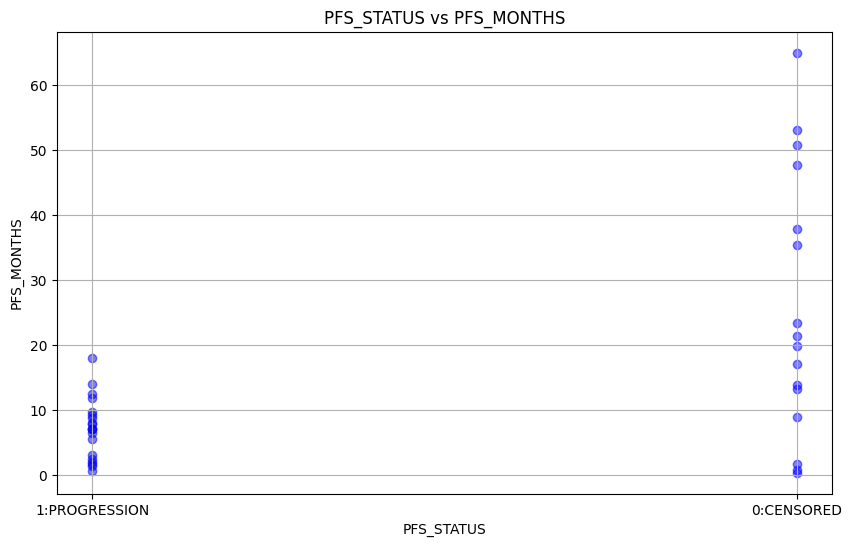

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.read_excel("your_file.xlsx")

# # Plot PFS_MONTHS vs PFS_STATUS
# plt.figure(figsize=(10, 6))
# plt.scatter(data['PFS_MONTHS'], data['PFS_STATUS'], color='blue', alpha=0.5)
# plt.title('PFS_MONTHS vs PFS_STATUS')
# plt.xlabel('PFS_MONTHS')
# plt.ylabel('PFS_STATUS')
# plt.grid(True)
# plt.show()


# Plot PFS_STATUS vs PFS_MONTHS
plt.figure(figsize=(10, 6))
plt.scatter(data['PFS_STATUS'], data['PFS_MONTHS'], color='blue', alpha=0.5)
plt.title('PFS_STATUS vs PFS_MONTHS')
plt.xlabel('PFS_STATUS')
plt.ylabel('PFS_MONTHS')
plt.grid(True)
plt.show()



In [73]:
# Data preprocessing
# Handling missing values
data.dropna(inplace=True)

# Encoding categorical variables (if any)
data = pd.get_dummies(data)

In [75]:
data.sample(5)
# data

,AGE,FEMALE,MALE,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,OS_MONTHS,PFS_MONTHS,ID_TCGA-3X-AAV9TCGA-3X-AAV9-01,ID_TCGA-3X-AAVATCGA-3X-AAVA-01,ID_TCGA-3X-AAVCTCGA-3X-AAVC-01,ID_TCGA-3X-AAVETCGA-3X-AAVE-01,...,TISSUE_SOURCE_SITE_CODE_WD,TISSUE_SOURCE_SITE_CODE_YR,TISSUE_SOURCE_SITE_CODE_ZD,TISSUE_SOURCE_SITE_CODE_ZH,TISSUE_SOURCE_SITE_CODE_ZU,TUMOR_TISSUE_SITE_Bile Duct,OS_STATUS_0:LIVING,OS_STATUS_1:DECEASED,PFS_STATUS_0:CENSORED,PFS_STATUS_1:PROGRESSION
12,77,1,0,0,50.695335,50.695335,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
8,70,1,0,0,35.407831,35.407831,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32,69,0,1,0,40.405037,7.956077,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
9,66,0,1,0,63.747247,7.134168,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
29,74,1,0,0,12.657396,1.610941,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [76]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['PFS_MONTHS'])
y = data['PFS_MONTHS']


In [77]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [79]:
# Predict on the test set
y_pred = model.predict(X_test)


In [80]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 178.217005916241


In [81]:
# Get the maximum and minimum values of PFS_MONTHS
max_pfs_months = data['PFS_MONTHS'].max()
min_pfs_months = data['PFS_MONTHS'].min()

print("Maximum PFS_MONTHS:", max_pfs_months)
print("Minimum PFS_MONTHS:", min_pfs_months)

Maximum PFS_MONTHS: 64.96367163
Minimum PFS_MONTHS: 0.32876352


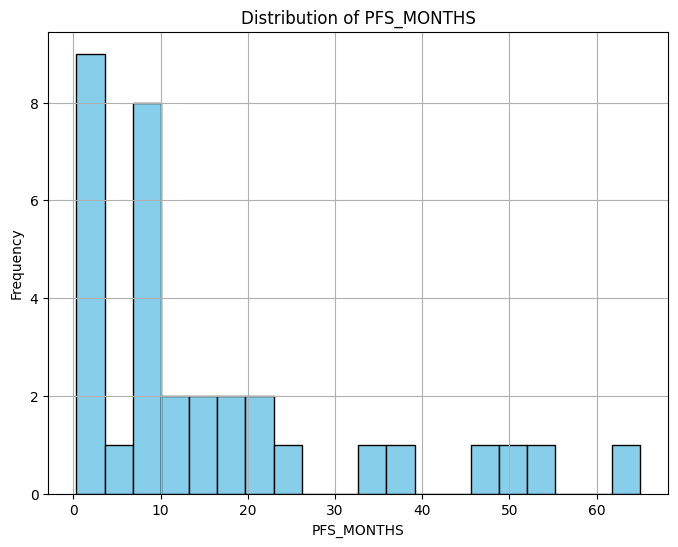

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.read_excel("your_file.xlsx")

# Plot the distribution of PFS_MONTHS
plt.figure(figsize=(8, 6))
plt.hist(data['PFS_MONTHS'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of PFS_MONTHS')
plt.xlabel('PFS_MONTHS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [56]:
data.sample(5)

,AGE,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,OS_MONTHS,PFS_MONTHS,ID_TCGA-3X-AAV9TCGA-3X-AAV9-01,ID_TCGA-3X-AAVATCGA-3X-AAVA-01,ID_TCGA-3X-AAVCTCGA-3X-AAVC-01,ID_TCGA-3X-AAVETCGA-3X-AAVE-01,ID_TCGA-4G-AAZOTCGA-4G-AAZO-01,ID_TCGA-4G-AAZTTCGA-4G-AAZT-01,...,TISSUE_SOURCE_SITE_CODE_WD,TISSUE_SOURCE_SITE_CODE_YR,TISSUE_SOURCE_SITE_CODE_ZD,TISSUE_SOURCE_SITE_CODE_ZH,TISSUE_SOURCE_SITE_CODE_ZU,TUMOR_TISSUE_SITE_Bile Duct,OS_STATUS_0:LIVING,OS_STATUS_1:DECEASED,PFS_STATUS_0:CENSORED,PFS_STATUS_1:PROGRESSION
3,72,0,23.309334,23.309334,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
35,52,0,3.221882,2.367097,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
22,51,0,46.092646,11.901239,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32,69,0,40.405037,7.956077,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
5,71,0,38.695466,13.939573,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1


In [57]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # # Load the dataset
# # data = pd.read_excel("your_file.xlsx")

# # Plot PFS_MONTHS vs combined PFS_STATUS
# plt.figure(figsize=(10, 6))

# # Plot censored events
# plt.scatter(data[data['PFS_STATUS'] == 'CENSORED']['PFS_MONTHS'], 'CENSORED', color='blue', label='Censored', alpha=0.5)

# # Plot progression events
# plt.scatter(data[data['PFS_STATUS'] == 'PROGRESSION']['PFS_MONTHS'], 'PROGRESSION', color='red', label='Progression', alpha=0.5)

# plt.title('PFS_MONTHS vs PFS_STATUS')
# plt.xlabel('PFS_MONTHS')
# plt.ylabel('PFS_STATUS')
# plt.legend()
# plt.grid(True)
# plt.show()
